# Dia 2: Análise de dados e Storytelling da CEAPS (2018-2022)

Este notebook dá continuidade à análise dos dados da CEAPS (Cota para o Exercício da Atividade Parlamentar dos Senadores), cobrindo o período de 2018 a 2022. No notebook anterior, realizamos a limpeza e o pré-processamento dos dados. Agora, focaremos na análise exploratória, visualização e storytelling, buscando responder às seguintes perguntas e testar as hipóteses relacionadas aos gastos dos senadores.

### Principais Hipóteses

* **Variação nos gastos:**
    * Espera-se que haja uma variação significativa nos gastos entre os senadores, influenciada por suas atividades parlamentares.

* **Concentração em despesas específicas:**
    * Acredita-se que a maior parte dos gastos esteja concentrada em tipos específicos de despesa, como divulgação da atividade parlamentar.

* **Sazonalidade dos gastos:**
    * Antecipa-se uma sazonalidade nos gastos, com picos em meses próximos a eleições ou períodos de maior atividade parlamentar.

* **Influência de anos eleitorais:**
    * Espera-se que os gastos aumentem em anos eleitorais, devido à maior necessidade de divulgação das atividades parlamentares.

* **Padrões de Contratação de Fornecedores:**
    * Acredita-se que alguns fornecedores sejam contratados com mais frequência, indicando padrões de compras recorrentes.

* **Disparidade nos gastos totais:**
    * Espera-se uma grande disparidade nos gastos totais entre os senadores, com alguns gastando significativamente mais do que outros.

* **Outliers nos gastos:**
    * Acredita-se que existam outliers nos gastos reembolsados, indicando senadores com valores muito acima da média.

* **Variação nos gastos por tipo de despesa:**
    * Espera-se que os senadores distribuam seus gastos entre os tipos de despesa de maneira diferente.

* **Variação na média de reembolso por tipo de despesa:**
    * Espera-se que alguns tipos de despesa tenham valores médios mais altos, como gastos com viagens ou publicidade.

# Importações

## 0.1 Bibliotecas e módulos

In [82]:
# Importa bibliotecas e módulos para análise e visualização de dados
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots

## 0.2 Carregamento dos dados limpos

In [83]:
# Carrega os dados limpos do arquivo pickle gerado pelo 01_data_cleaning.ipynb e exibe as primeiras linhas
df_ceaps_limpo = pd.read_pickle('/Users/liviagrigolon/Documents/GitHub/7-days-of-data-science/data/processed/despesa_ceaps_2018_2022_limpo.pkl')
df_ceaps_limpo.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
1,2018,Janeiro,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacionais",63764211000110,transcontinental agencia de viagens,M2CJMM,2018-01-02,"Companhia Aérea: AVIANCA, Localizador: M2CJMM. Passageiros: ACIR MARCOS GURGACZ (Matrícula 225736, PARLAMENTAR), Voo: 6109 - NVTGRU - 31/01/2018;",274.99,2088476
2,2018,Janeiro,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacionais",63764211000110,transcontinental agencia de viagens,SFEXYF,2018-01-02,"Companhia Aérea: LATAM, Localizador: SFEXYF. Passageiros: ACIR MARCOS GURGACZ (Matrícula 225736, PARLAMENTAR), Voo: 3303 - NVTCGH - 15/01/2018; ACIR MARCOS GURGACZ (Matrícula 225736, PARLAMENTAR), Voo: 3594 - BSBPVH - 15/01/2018; ACIR MARCOS GURGACZ (Matrícula 225736, PARLAMENTAR), Voo: 3704 - CGHBSB - 15/01/2018;",1094.29,2088528
3,2018,Janeiro,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacionais",63764211000110,transcontinental agencia de viagens,V64HTR,2018-01-24,"Companhia Aérea: AZUL, Localizador: V64HTR. Passageiros: ACIR MARCOS GURGACZ (Matrícula 225736, PARLAMENTAR), Voo: 2633 - BVHCGB - 25/01/2018; ACIR MARCOS GURGACZ (Matrícula 225736, PARLAMENTAR), Voo: 2515 - GRUNVT - 25/01/2018; ACIR MARCOS GURGACZ (Matrícula 225736, PARLAMENTAR), Voo: 2605 - CGBGRU - 25/01/2018;",1553.99,2088475
5,2018,Fevereiro,ACIR GURGACZ,Divulgação da atividade parlamentar,27170469000125,infiniti comunicacao,0019,2018-02-07,Despesa com divulgação da atividade parlamentar em rádio,1000.00,2088478
6,2018,Fevereiro,ACIR GURGACZ,Divulgação da atividade parlamentar,26320603000164,informanahora,00000005,2018-03-02,Despesa com divulgação da atividade parlamentar no site INFORMANAHORA.COM.BR,3000.00,2090387


# 1 Análise Exploratória de Dados (AED)

## 1.1 Exploração inicial dos dados

In [84]:
# Verifica a estrutura do DataFrame
df_ceaps_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85857 entries, 1 to 93847
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ANO                85857 non-null  int64         
 1   MES                85857 non-null  string        
 2   SENADOR            85857 non-null  string        
 3   TIPO_DESPESA       85857 non-null  string        
 4   CNPJ_CPF           85857 non-null  string        
 5   FORNECEDOR         85857 non-null  object        
 6   DOCUMENTO          85857 non-null  string        
 7   DATA               85852 non-null  datetime64[ns]
 8   DETALHAMENTO       85857 non-null  string        
 9   VALOR_REEMBOLSADO  85857 non-null  float64       
 10  COD_DOCUMENTO      85857 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1), string(6)
memory usage: 7.9+ MB


In [85]:
# Contagem de valores únicos em colunas relevantes
print("Valores únicos para cada coluna:")
print(df_ceaps_limpo.nunique())


Valores únicos para cada coluna:
ANO                      5
MES                     12
SENADOR                171
TIPO_DESPESA             7
CNPJ_CPF              9188
FORNECEDOR            9436
DOCUMENTO            71234
DATA                  1935
DETALHAMENTO         29924
VALOR_REEMBOLSADO    39440
COD_DOCUMENTO        85857
dtype: int64


In [86]:
# Estatísticas descritivas para todas as variáveis
df_ceaps_limpo.describe(include='all')

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
count,85857.000000,85857,85857,85857,85857,85857,85857,85852,85857,85857.000000,8.585700e+04
unique,NaN,12,171,7,9188,9436,71234,NaN,29924,NaN,NaN
top,NaN,Março,WELLINGTON FAGUNDES,"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",16978175000108,adria viagens e turismo,Desconhecido,NaN,Não informado,NaN,NaN
freq,NaN,8176,2640,33816,6924,6402,3268,NaN,32635,NaN,NaN
mean,2019.754662,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-28 18:46:33.719424,NaN,697.105911,2.139114e+06
min,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,1957-12-19 00:00:00,NaN,0.010000,2.085892e+06
25%,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-30 00:00:00,NaN,136.000000,2.111940e+06
50%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-18 00:00:00,NaN,312.900000,2.139002e+06
75%,2021.000000,NaN,NaN,NaN,NaN,NaN,NaN,2021-08-11 00:00:00,NaN,1053.600000,2.165532e+06
max,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,2023-12-23 00:00:00,NaN,3444.530000,2.199784e+06


# 2 Análise estatística e visualizações

### 2.1 Senadores com maiores gastos
  **Pergunta:** Quais foram os senadores que mais gastaram com reembolsos durante o período analisado?  
  
  **Hipótese:** Alguns senadores podem ter uma despesa significativamente maior do que outros, dependendo das atividades parlamentares que realizam.

In [87]:
# Agrupar os dados por "SENADOR" e somar os valores de "VALOR_REEMBOLSADO"
df_senador_gastos = df_ceaps_limpo.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().reset_index()

# Ordenar os resultados de forma decrescente
df_senador_gastos_sorted = df_senador_gastos.sort_values(by='VALOR_REEMBOLSADO', ascending=False)

# Exibir os 10 senadores que mais gastaram
print("Senadores que mais declararam despesas:")
df_senador_gastos_sorted.head(10)

Senadores que mais declararam despesas:


,SENADOR,VALOR_REEMBOLSADO
47,FERNANDO BEZERRA COELHO,1344952.67
142,ROMÁRIO,1204755.58
158,VENEZIANO VITAL DO RÊGO,1194847.98
127,RANDOLFE RODRIGUES,1109164.94
43,ELMANO FÉRRER,1058062.06
44,ESPERIDIÃO AMIN,1057596.06
154,TELMÁRIO MOTA,1046236.56
60,HUMBERTO COSTA,1023276.15
89,LUCAS BARRETO,1022095.24
163,WELLINGTON FAGUNDES,1019032.12


Ao analisarmos os dados, fica evidente que alguns senadores se destacam com gastos totais de reembolso consideravelmente superiores aos demais. Fernando Bezerra Coelho, por exemplo, lidera a lista com R$ 1.344.952,67, seguido por Romário e Veneziano Vital do Rêgo, ambos ultrapassando a marca de R$ 1.190.000. 

Essa disparidade nos gastos levanta questões cruciais: seriam esses valores reflexo de atividades parlamentares mais intensas, ou indicariam uma necessidade de recursos adicionais para suas funções? A distribuição dos recursos é equitativa entre os senadores, ou há disparidades que podem indicar privilégios ou desigualdades? A investigação mais aprofundada dos tipos de despesas e das atividades realizadas por esses senadores pode fornecer insights valiosos para compreendermos melhor essa variação.

### 2.2 Tipos de despesa mais frequentes
   **Pergunta**: Quais tipos de despesa aparecem com mais frequência nos registros dos senadores?
   
   **Hipótese**: Certas categorias de despesa, como divulgação da atividade parlamentar e passagens aéreas, podem ser registradas com maior frequência, refletindo padrões operacionais comuns no uso da cota parlamentar.

In [88]:
# Criar uma tabela com os tipos de despesas, contagens e porcentagens
tabela_categorias = df_ceaps_limpo["TIPO_DESPESA"].value_counts(normalize=True).reset_index()
tabela_categorias.columns = ["Tipo de despesa", "Proporção"]
tabela_categorias["Ocorrência"] = df_ceaps_limpo["TIPO_DESPESA"].value_counts().values
tabela_categorias["Proporção (%)"] = (tabela_categorias["Proporção"] * 100).round(2)

# Reorganizar colunas para melhor visualização
tabela_categorias = tabela_categorias[["Tipo de despesa", "Ocorrência", "Proporção (%)"]]

# Exibir a tabela
pd.options.display.max_colwidth = None  # Mostra o texto completo na tabela
display(tabela_categorias)


,Tipo de despesa,Ocorrência,Proporção (%)
0,"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes",33816,39.39
1,"Passagens aéreas, aquáticas e terrestres nacionais",20105,23.42
2,"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.",18315,21.33
3,"Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.",6432,7.49
4,Divulgação da atividade parlamentar,4230,4.93
5,"Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",2830,3.3
6,Serviços de Segurança Privada,129,0.15


A distribuição dos tipos de despesa revela que 'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes' e 'Passagens aéreas, aquáticas e terrestres nacionais' são as categorias predominantes. Isso indica que uma parte significativa dos recursos parlamentares é destinada a despesas com deslocamento e manutenção das atividades externas dos senadores.

### 2.3 Distribuição mensal de gastos
   **Pergunta:** Como as despesas dos senadores variam ao longo dos meses de cada ano?  
   **Hipótese:** Pode haver uma sazonalidade nos gastos, com meses de maior gasto, como aqueles próximos às eleições ou períodos de maior atividade parlamentar.

In [89]:
# Agrupar os dados por ANO e MES, somando os valores reembolsados
df_mensal = df_ceaps_limpo.groupby(['ANO', 'MES'])['VALOR_REEMBOLSADO'].sum().reset_index()

# Converter 'MES' para categórico com a ordem correta dos meses
meses_ordem = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
df_mensal['MES'] = pd.Categorical(df_mensal['MES'], categories=meses_ordem, ordered=True)

# Converter 'ANO' para categórico com a ordem correta dos anos
anos_ordem = sorted(df_mensal['ANO'].unique())
df_mensal['ANO'] = pd.Categorical(df_mensal['ANO'], categories=anos_ordem, ordered=True)

# Ordenar o DataFrame pelas novas colunas categóricas
df_mensal = df_mensal.sort_values(['ANO', 'MES'])

fig = px.line(
    df_mensal, 
    x='MES', 
    y='VALOR_REEMBOLSADO', 
    color='ANO', 
    title="Evolução das despesas dos senadores por mês",
    markers=True,
    labels={'VALOR_REEMBOLSADO': 'Total Reembolsado (R$)', 'MES': 'Mês'},
    color_discrete_sequence=px.colors.qualitative.Bold  # Paleta Dark24 para diferenciar anos
)

# Ajustar layout para manter um padrão
fig.update_layout(
    title=dict(text="Evolução das despesas dos senadores por mês", x=0.5, font=dict(size=18, family="Arial, sans-serif")),
    xaxis=dict(title="Mês", showgrid=True, gridcolor="lightgrey", title_standoff=10),  # Adiciona espaço abaixo do título do eixo X
    yaxis=dict(title="Total reembolsado (R$)", showgrid=True, gridcolor="lightgrey"),
    template="plotly_white",
    font=dict(family="Arial, sans-serif", size=14),
    legend=dict(title="Ano", orientation="h", yanchor="top", y=-0.4, xanchor="center", x=0.5),  # Move a legenda mais para baixo
    margin=dict(l=50, r=50, t=50, b=70),  # Aumenta a margem inferior para evitar sobreposição
    plot_bgcolor="rgba(0,0,0,0)",
)

# Ajustar espessura da linha e marcadores para combinar com o outro gráfico
fig.update_traces(
    line=dict(width=3),
    marker=dict(size=8, symbol="circle"),
    hovertemplate="Mês: %{x}<br>Reembolso: R$%{y:,.2f}<br>Ano: %{legendgroup}"
)

fig.show()

- Sazonalidade nos gastos: Há variações anuais nos gastos, com quedas nos meses de janeiro e fevereiro (recesso parlamentar) e aumentos entre março e agosto, refletindo o retorno das atividades legislativas. O final do ano apresenta flutuações, com picos em anos eleitorais.
- Efeito dos anos eleitorais (2018 e 2022): Gastos elevados, especialmente em outubro, sugerem aumento de despesas com divulgação e atividades relacionadas às campanhas.
- Impacto da Pandemia (2020): Redução acentuada dos gastos em abril e maio, possivelmente devido à limitação de viagens e eventos.
- Fatores externos e internos: Além da sazonalidade, decisões individuais dos senadores, mudanças na legislação e eventos políticos influenciam a dinâmica dos gastos.

A análise demonstra que os padrões de despesas parlamentares são afetados por múltiplos fatores, exigindo uma abordagem contextual para interpretação dos dados.

### 2.4 Comparação anual de gastos
   **Pergunta:** Houve um aumento ou diminuição nos gastos dos senadores ao longo dos anos?  
   
   **Hipótese:** Os gastos podem aumentar em anos eleitorais devido a uma maior necessidade de divulgação das atividades parlamentares.

In [90]:
# Agrupar os gastos por ano e somar os valores reembolsados
df_anos = df_ceaps_limpo.groupby("ANO")["VALOR_REEMBOLSADO"].sum().reset_index()

# Ordenar os anos para garantir a sequência correta no gráfico
df_anos = df_anos.sort_values("ANO")

fig = px.line(df_anos, x="ANO", y="VALOR_REEMBOLSADO", markers=True, 
              title="Evolução dos Gastos dos Senadores por Ano",
              line_shape="spline",
              color_discrete_sequence=["#8B008B"]
)

# Melhorar o layout do gráfico
fig.update_layout(
    title=dict(text="Evolução dos gastos dos senadores por ano", x=0.5, font=dict(size=18, family="Arial, sans-serif")),
    xaxis_title="Ano",
    yaxis_title="Total reembolsado (R$)",
    template="plotly_white",
    font=dict(family="Arial, sans-serif", size=14),
    margin=dict(l=50, r=50, t=50, b=50),
    hovermode="x unified",
    plot_bgcolor="rgba(0,0,0,0)",
    xaxis=dict(showgrid=True, gridcolor="lightgrey"),
    yaxis=dict(showgrid=True, gridcolor="lightgrey"),
)

# Adicionar rótulos e estilizar linha e marcadores
fig.update_traces(
    line=dict(width=3),
    marker=dict(size=8, symbol="circle", color="#636EFA"),  
    hovertemplate="Ano: %{x}<br>Reembolso: R$%{y:,.2f}"
)

fig.show()


In [91]:
# Calcula a variação percentual ano a ano no valor reembolsado
df_anos["VARIACAO_%"] = df_anos["VALOR_REEMBOLSADO"].pct_change() * 100
print(df_anos)

    ANO  VALOR_REEMBOLSADO  VARIACAO_%
0  2018        13582786.67         NaN
1  2019        13403245.08   -1.321832
2  2020         8415463.03  -37.213242
3  2021        11870980.98   41.061531
4  2022        12578946.44    5.963833


Os dados mostram uma variação significativa nos gastos reembolsados ao longo dos anos. Em 2020, houve uma queda expressiva de 37,21%, possivelmente devido às restrições da pandemia, que reduziram deslocamentos e eventos presenciais. No ano seguinte, 2021, os gastos voltaram a crescer 41,06%, sugerindo uma retomada das atividades parlamentares. Em 2022, ano eleitoral, houve um aumento mais moderado de 5,96%, o que pode indicar um impacto menor da eleição nos gastos em comparação com outros fatores.

### 2.5 Fornecedores com mais transações
   **Pergunta:** Quais fornecedores foram mais contratados pelos senadores para reembolsar despesas?  
   
   **Hipótese:** Alguns fornecedores podem ser contratados com mais frequência, o que pode indicar padrões de compras recorrentes.

In [92]:
# Contar a frequência de cada fornecedor
df_fornecedores = df_ceaps_limpo["FORNECEDOR"].value_counts().reset_index()
df_fornecedores.columns = ["FORNECEDOR", "Frequência"]

# Identificar os fornecedores mais contratados
top_fornecedores = df_fornecedores.head(5)

# Criar gráfico de Treemap com melhorias visuais
fig = px.treemap(
    top_fornecedores,
    path=["FORNECEDOR"],  # Apenas um nível de hierarquia
    values="Frequência",
    title="Top 5 Fornecedores Mais Frequentes",
    color="Frequência",
    color_continuous_scale=px.colors.sequential.dense,  # Paleta sequencial mais harmônica
)

# Ajustar layout para manter o padrão visual
fig.update_layout(
    template="plotly_white",
    title=dict(text="Top 5 fornecedores mais frequentes", x=0.5, font=dict(size=18, family="Arial, sans-serif")),
    font=dict(family="Arial, sans-serif", size=14),
    margin=dict(l=20, r=20, t=50, b=20),
    coloraxis_colorbar=dict(title="Frequência"),
)

fig.show()

A análise dos fornecedores mais frequentes mostra que a Adria Viagens e Turismo é a empresa mais contratada pelos senadores (6.402 reembolsos), seguida por companhias aéreas como LATAM (2.440) e GOL (1.262). Empresas de telecomunicações, como Telefônica Brasil (894) e Claro (866), também estão entre as principais.

- Gastos com viagens dominam: O alto número de reembolsos para agências e companhias aéreas reforça que deslocamentos são uma das principais despesas parlamentares.
- Serviços de telecomunicações são recorrentes: Custos com telefonia e internet são constantes entre os senadores.
- Padrões previsíveis de consumo: A concentração de gastos em poucos fornecedores pode indicar contratos contínuos ou preferências institucionais, facilitando análises futuras sobre otimização de custos.

### 2.6 Frequência dos detalhamentos de despesas
   **Pergunta:** Quais são os detalhamentos de despesa mais recorrentes nos reembolsos parlamentares?

   **Hipótese:** Muitos reembolsos podem não ter um detalhamento específico informado, indicando possíveis lacunas na transparência do uso dos recursos.

In [93]:
# Criar uma tabela com os detalhamentos mais frequentes
tabela_detalhamentos = df_ceaps_limpo["DETALHAMENTO"].value_counts(normalize=True).reset_index()
tabela_detalhamentos.columns = ["Detalhamento", "Proporção"]
tabela_detalhamentos["Ocorrência"] = df_ceaps_limpo["DETALHAMENTO"].value_counts().values
tabela_detalhamentos["Proporção (%)"] = (tabela_detalhamentos["Proporção"] * 100).round(2)

# Reorganizar colunas para melhor visualização
tabela_detalhamentos = tabela_detalhamentos[["Detalhamento", "Ocorrência", "Proporção (%)"]]

# Exibir os 10 principais detalhamentos
pd.options.display.max_colwidth = None  # Mostra o texto completo na tabela
display(tabela_detalhamentos.head(10))

,Detalhamento,Ocorrência,Proporção (%)
0,Não informado,32635,38.01
1,Aquisição de combustível para veículos utilizados na atividade parlamentar.,1541,1.79
2,DESPESA COM COMBUSTÍVEL EM VEÍCULOS UTILIZADOS NA ATIVIDADE PARLAMENTAR.,1484,1.73
3,Serviço de táxi utilizado durante as atividades parlamentares.,805,0.94
4,DESPESA COM ALIMENTAÇÃO.,614,0.72
5,Senador José Serra - Aquisição de combustível para veículo utilizado na atividade parlamentar.,577,0.67
6,Despesa com divulgação da atividade parlamentar,450,0.52
7,Despesa com combustível para veículo utilizado durante a atividade parlamentar.,446,0.52
8,Despesa com aquisição de combustível para veículo utilizado na atividade parlamentar,376,0.44
9,DESPESA COM COMBUSTÍVEL QUE SERVE O SENADOR EDUARDO GOMES EM SUAS ATIVIDADES PARLAMENTARES.,282,0.33


#### 2.6.1 Gastos sem detalhamento específico

In [94]:
# Filtrar apenas as despesas da categoria "Não informado"
nao_informado = df_ceaps_limpo[df_ceaps_limpo["DETALHAMENTO"] == "Não informado"]

# Agrupar por parlamentar e somar os gastos
gastos_nao_informado = nao_informado.groupby("SENADOR")["VALOR_REEMBOLSADO"].sum().sort_values(ascending=False)

# Exibir os 10 parlamentares que mais gastaram nessa categoria
print("Os 10 senadores com maior volume de reembolsos na categoria 'Não informado' são:")
print(gastos_nao_informado.head(10))

Os 10 senadores com maior volume de reembolsos na categoria 'Não informado' são:
SENADOR
CARLOS VIANA               750863.28
ZENAIDE MAIA               729683.98
TELMÁRIO MOTA              697450.02
VENEZIANO VITAL DO RÊGO    614603.69
LUCAS BARRETO              610430.46
DANIELLA RIBEIRO           608463.51
ESPERIDIÃO AMIN            575819.82
ROGÉRIO CARVALHO           504575.72
ROMÁRIO                    495050.55
JEAN PAUL PRATES           470736.00
Name: VALOR_REEMBOLSADO, dtype: float64


A análise das despesas por detalhamento revela que a categoria "Não informado" concentra a maior parte dos gastos, totalizando R$ 18.372.506,60, o que compromete a transparência e dificulta a avaliação detalhada. Entre as categorias especificadas, os maiores valores estão relacionados à divulgação da atividade parlamentar e combustíveis.

Além disso, alguns senadores concentram altos valores na categoria "Não informado", com reembolsos entre R$ 470.736,00 e R$ 750.863,28, levantando questões sobre a transparência desses gastos.

- O alto percentual de despesas sem detalhamento pode indicar falhas na prestação de contas.
- A categorização dos gastos apresenta inconsistências, como múltiplas categorias para despesas similares.
- Entre as despesas informadas, há um grande investimento em divulgação e combustíveis.

Recomenda-se um maior rigor no detalhamento dos reembolsos para garantir maior transparência e facilitar a fiscalização.

### 2.7 Valor médio de reembolso por senador
   **Pergunta:** Qual é a média de valores reembolsados por senador?  
   
   **Hipótese:** Alguns senadores podem estar recebendo um valor muito abaixo ou acima da média, o que pode ser interessante de investigar.

In [95]:
# Calcular a média de valor reembolsado por senador
media_reembolso_senador = df_ceaps_limpo.groupby("SENADOR")["VALOR_REEMBOLSADO"].mean().sort_values(ascending=False)

# Exibir os 10 senadores com maior média de reembolso
print("Os 10 senadores com maior média de reembolso são:\n")
print(media_reembolso_senador.head(10))

Os 10 senadores com maior média de reembolso são:

SENADOR
NEY SUASSUNA            2212.391000
FABIO GARCIA            2130.713043
RAFAEL TENÓRIO          2004.297209
OMAR AZIZ               1967.724074
SAMUEL ARAUJO           1927.725000
ELIZIANE GAMA           1915.311993
EDISON LOBÃO            1913.325185
VIRGINIO DE CARVALHO    1906.853333
EDUARDO VELLOSO         1846.051429
DRA. EUDÓCIA            1844.546562
Name: VALOR_REEMBOLSADO, dtype: float64


A média de reembolso por senador varia consideravelmente, com Ney Suassuna liderando (R$ 2.212,39), seguido por Fábio Garcia (R$ 2.130,71) e Rafael Tenório (R$ 2.004,30). Essa diferença pode estar relacionada ao tipo de despesa, frequência dos pedidos ou diferentes padrões de gastos.

- Há grande variação entre os senadores, indicando perfis distintos de reembolsos.
- Despesas de maior valor, como passagens e publicidade, podem influenciar a média.
- Alguns parlamentares podem acumular ou parcelar gastos antes da solicitação.
U
ma análise mais aprofundada, cruzando esses dados com categorias de despesa e frequência de pedidos, pode esclarecer melhor essas diferenças.

### 2.8 Gastos em anos eleitorais
   **Pergunta:** Os gastos com "Divulgação da Atividade Parlamentar" aumentam durante os anos eleitorais?  
   
   **Hipótese:** Durante os anos de eleição, pode haver mais reembolsos relacionados a divulgação.

In [96]:
# Filtrar apenas os gastos com "Divulgação da Atividade Parlamentar"
df_divulgacao = df_ceaps_limpo[df_ceaps_limpo["TIPO_DESPESA"].str.contains("Divulgação", case=False, na=False)]

# Agrupar por ano e somar os gastos
gastos_divulgacao_por_ano = df_divulgacao.groupby("ANO")["VALOR_REEMBOLSADO"].sum().reset_index()

# Criar o gráfico de linha
fig = px.line(
    gastos_divulgacao_por_ano,
    x="ANO",
    y="VALOR_REEMBOLSADO",
    markers=True,
    title="Evolução dos gastos com divulgação da atividade parlamentar",
)

# Melhorar a estética do gráfico
fig.update_layout(
    xaxis_title="Ano",
    yaxis_title="Total reembolsado (R$)",
    template="plotly_white",
    title_x=0.5,  # Centralizar título
    font=dict(family="Arial, sans-serif", size=14),  # Fonte padrão
    title_font=dict(size=18, family="Arial, sans-serif"),
    yaxis=dict(tickformat=".2f", showgrid=True, gridcolor="lightgrey"),  # Melhorar formatação e grade
    xaxis=dict(
        tickmode="linear",
        tick0=min(gastos_divulgacao_por_ano["ANO"]),
        dtick=1,
        showgrid=True,
        gridcolor="lightgrey"
    ),
    margin=dict(l=50, r=30, t=50, b=50),
    hovermode="x unified",
    plot_bgcolor="rgba(0,0,0,0)",  # Fundo transparente
)

# Ajustar traços e marcadores
fig.update_traces(
    line=dict(color="#8B008B", width=3),
    marker=dict(size=8, symbol="circle", color="#8B008B"),
    hovertemplate="Ano: %{x}<br>Reembolso: R$%{y:,.2f}"
)

fig.show()

Diferente do esperado, os gastos com Divulgação da Atividade Parlamentar não aumentam necessariamente em anos eleitorais. Embora 2022 tenha registrado um valor considerável (R$ 1,1 milhão), o maior gasto ocorreu em 2021 (R$ 1,52 milhão), um ano não eleitoral. Da mesma forma, 2019 e 2020 também tiveram despesas superiores às de 2018.

Isso sugere que os parlamentares mantêm um padrão constante de investimento em divulgação, independentemente do calendário eleitoral. O crescimento contínuo entre 2019 e 2021 pode estar relacionado a outros fatores externos, como mudanças nas estratégias de comunicação, novas regulamentações ou até o impacto da pandemia na necessidade de comunicação digital.

Seria interessante analisar quais senadores concentram os maiores gastos e se há mudanças na destinação dos valores entre anos eleitorais e não eleitorais. Além disso, investigar se há picos de gastos em períodos específicos do ano pode fornecer mais insights sobre essa dinâmica.

### 2.9 Comparação de gastos entre senadores
   **Pergunta:** Qual a distribuição dos gastos totais entre os senadores? Alguns senadores gastam muito, enquanto outros gastam pouco?  
   
   **Hipótese:** Pode haver uma grande disparidade nos gastos, com alguns senadores gastando significativamente mais do que outros.

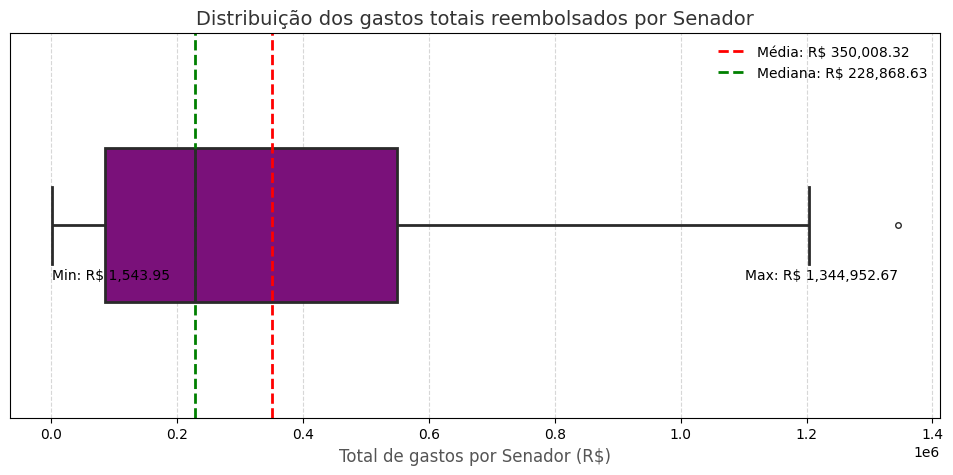

In [97]:
# Agrupar os dados por senador e calcular o total de gastos
gastos_totais = df_ceaps_limpo.groupby("SENADOR")["VALOR_REEMBOLSADO"].sum().values

# Calculando estatísticas
media = np.mean(gastos_totais)
mediana = np.median(gastos_totais)
minimo = np.min(gastos_totais)
maximo = np.max(gastos_totais)

# Criando o boxplot com melhorias visuais
plt.figure(figsize=(12, 5))
sns.boxplot(x=gastos_totais, color="#8B008B", width=0.4, fliersize=4, linewidth=2)

# Adicionando linhas para média e mediana
plt.axvline(media, color="red", linestyle="--", linewidth=2, label=f"Média: R$ {media:,.2f}")
plt.axvline(mediana, color="green", linestyle="--", linewidth=2, label=f"Mediana: R$ {mediana:,.2f}")

# Adicionando textos para mínimo e máximo
plt.text(minimo, 0.13, f"Min: R$ {minimo:,.2f}", color="black", fontsize=10, verticalalignment="center")
plt.text(maximo, 0.13, f"Max: R$ {maximo:,.2f}", color="black", fontsize=10, horizontalalignment="right", verticalalignment="center")

# Melhorando os rótulos
plt.title("Distribuição dos gastos totais reembolsados por Senador", fontsize=14, fontweight="normal", color="#333333")
plt.xlabel("Total de gastos por Senador (R$)", fontsize=12, color="#555555")
plt.yticks([])
plt.legend(fontsize=10, loc="upper right", frameon=False)

# Adicionando grid apenas no eixo X para manter o padrão
plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()

#### 2.9.1 Identificação de outliers

In [98]:
# Ordenando os senadores pelo total reembolsado
df_gastos_por_senador = df_ceaps_limpo.groupby("SENADOR")["VALOR_REEMBOLSADO"].sum().reset_index()

# Ordenando do menor para o maior
df_gastos_ordenado = df_gastos_por_senador.sort_values(by="VALOR_REEMBOLSADO")

# Selecionando os 5 menores e os 5 maiores gastos
menores_gastos = df_gastos_ordenado.head(5).reset_index(drop=True)
maiores_gastos = df_gastos_ordenado.tail(5).reset_index(drop=True)

# Concatenando lado a lado
df_top_bottom = pd.concat([menores_gastos, maiores_gastos], axis=1)

# Renomeando as colunas para facilitar a leitura
df_top_bottom.columns = ["Senador (Menos Gasto)", "Gasto Total (R$)", "Senador (Mais Gasto)", "Gasto Total (R$)"]

# Exibir a tabela formatada
df_top_bottom


,Senador (Menos Gasto),Gasto Total (R$),Senador (Mais Gasto),Gasto Total (R$)
0,BLAIRO MAGGI,1543.95,ELMANO FÉRRER,1058062.06
1,NAILDE PANTA,1650.62,RANDOLFE RODRIGUES,1109164.94
2,VIRGINIO DE CARVALHO,5720.56,VENEZIANO VITAL DO RÊGO,1194847.98
3,SIQUEIRA CAMPOS,5926.99,ROMÁRIO,1204755.58
4,SAMUEL ARAUJO,7710.90,FERNANDO BEZERRA COELHO,1344952.67


O boxplot confirma a hipótese de que há uma grande disparidade nos gastos totais reembolsados entre os senadores. A presença de um outlier notável de R$ 1.344.952,67 (Fernando Bezerra Coelho) e a distribuição assimétrica dos dados indicam que alguns senadores gastam significativamente mais do que outros. 

A diferença entre a média (R$ 350.008,32) e a mediana (R$ 228.868,63) indica que a média é influenciada por valores extremos. O valor mínimo de R$ 1.543,95 destaca a grande variação nos gastos.

A análise detalhada dos tipos de despesas e das atividades realizadas pelos senadores com maiores gastos pode fornecer insights adicionais sobre os fatores que influenciam essa disparidade.


### 3.10 Média de valor reembolsado por tipo de despesa
   **Pergunta:** Qual é a média de reembolso por tipo de despesa?  
   
   **Hipótese:** Alguns tipos de despesa podem ter valores médios mais altos, como gastos com viagens ou publicidade.

/var/folders/tb/3rkysv496vs8fxvth4bytgs40000gn/T/ipykernel_91322/59488173.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




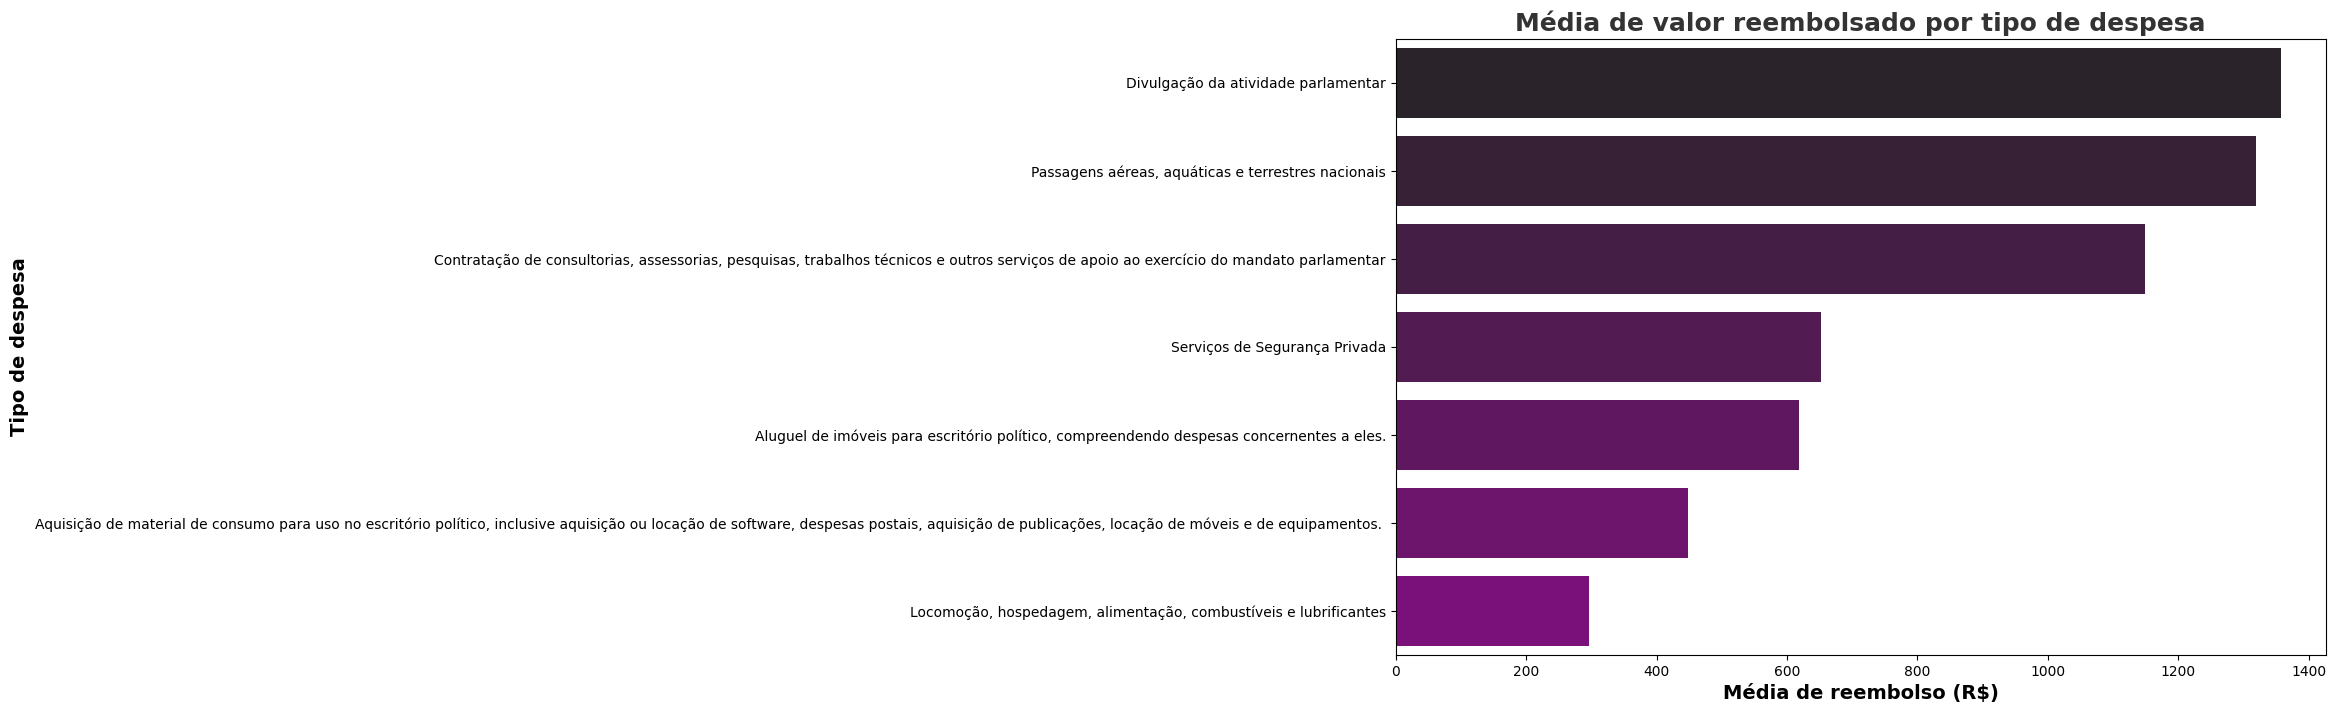

In [99]:
# Agrupar os dados por "TIPO_DESPESA" e calcular a média de "VALOR_REEMBOLSADO"
df_media_por_tipo = df_ceaps_limpo.groupby("TIPO_DESPESA")["VALOR_REEMBOLSADO"].mean().reset_index()

# Ordenar do maior para o menor valor de reembolso
df_media_por_tipo = df_media_por_tipo.sort_values(by="VALOR_REEMBOLSADO", ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
colors = sns.color_palette("dark:#8B008B", n_colors=len(df_media_por_tipo))

sns.barplot(
    data=df_media_por_tipo, 
    x="VALOR_REEMBOLSADO", 
    y="TIPO_DESPESA", 
    palette=colors
)

# Melhorar os rótulos
plt.xlabel("Média de reembolso (R$)", fontsize=14, fontweight="bold")
plt.ylabel("Tipo de despesa", fontsize=14, fontweight="bold")
plt.title("Média de valor reembolsado por tipo de despesa", fontsize=18, fontweight="bold", color="#333333")

plt.show()

Os maiores reembolsos médios estão em divulgação parlamentar, passagens e consultorias, indicando que senadores priorizam comunicação, deslocamento e assessoria. Já despesas operacionais e de locomoção têm os menores valores médios, sugerindo um controle maior nesses gastos.

## 1.3 Identificação de padrões e insights

A análise dos dados da CEAPS entre 2018 e 2022 permitiu identificar padrões relevantes e responder às hipóteses inicialmente propostas. Os resultados demonstram que os gastos parlamentares apresentam variações significativas entre senadores, com uma concentração expressiva em determinadas categorias de despesa e influência direta de fatores externos.

- Diferenças no uso da cota e perfis de gastos  
    -  Os dados mostram uma grande disparidade nos valores reembolsados pelos senadores. Enquanto alguns fazem uso moderado da cota, outros apresentam despesas significativamente superiores. Essa variação sugere diferentes estratégias na alocação dos recursos, refletindo prioridades individuais e abordagens distintas na gestão dos mandatos.  
- Principais categorias de despesa e concentração de gastos  
    -  Os reembolsos estão fortemente concentrados em poucas categorias, com destaque para divulgação da atividade parlamentar. Esse padrão reforça a importância da comunicação política e indica que os parlamentares investem consideravelmente em visibilidade. Outras despesas expressivas incluem transporte e assessoria técnica.  
- Influência do período eleitoral nos gastos  
    - Embora a análise não tenha identificado uma sazonalidade uniforme ao longo dos anos, observou-se um aumento expressivo nos gastos durante anos eleitorais, especialmente em categorias como publicidade. Esse comportamento sugere uma possível correlação entre o calendário político e a intensificação do uso da cota.  
- Padrões de fornecedores e contratos recorrentes  
    - Um pequeno grupo de fornecedores recebe uma parcela significativa dos reembolsos, indicando uma tendência de contratos recorrentes. Isso pode estar relacionado tanto à confiança em determinados prestadores de serviço quanto à pouca diversificação nas contratações.  
- Identificação de outliers e gastos atípicos  
    - Alguns senadores se destacam por apresentar gastos muito acima da média, caracterizando-se como outliers. Esse achado reforça a necessidade de uma análise mais detalhada sobre a justificativa dessas despesas, especialmente nas categorias de maior variação.  
- Valor médio reembolsado por tipo de despesa  
    - Os dados indicam que despesas como publicidade e viagens possuem valores médios de reembolso significativamente superiores às demais. Esse comportamento sugere que esses gastos são considerados estratégicos pelos parlamentares, seja para fortalecer a comunicação com o eleitorado ou para custear deslocamentos necessários ao mandato.  


## Conclusão

- Nesta etapa da análise, exploramos os padrões de gastos parlamentares e sua relação com fatores externos. Identificamos que os gastos apresentam grande variação entre senadores, com forte concentração em determinadas categorias e impacto direto do calendário eleitoral. 
- Além disso, detectamos outliers e padrões recorrentes na contratação de fornecedores, o que pode indicar tendências importantes na alocação dos recursos públicos. 
- Esses achados fornecem uma base sólida para futuras investigações e para o aprimoramento da transparência na gestão dos gastos parlamentares.

🔜 **Próximos passos:**  
A próxima etapa do projeto será a **previsão dos gastos parlamentares para os próximos meses**, utilizando técnicas de **forecasting**. Até o momento, analisamos os dados de forma descritiva para entender o comportamento passado dos gastos. Agora, avançaremos para a etapa de predição, aplicando modelos estatísticos e de aprendizado de máquina para estimar tendências futuras.

Com isso, daremos um passo além da análise descritiva e exploratória, utilizando técnicas de ciência de dados para antecipar cenários futuros e apoiar a tomada de decisão baseada em dados.